# Entornos y Trayectorias

El objetivo de esta práctica es estudiar el funcionamiento de los Algoritmos de Búsqueda Aleatoria, Local, Enfriamiento Simulado y Búsqueda Tabú.

El comportamiento de los algoritmos de OCH implementados deberá compararse con un Algoritmo Greedy

Este algoritmo debe maximizar los ingresos diarios para una instalación de planta solar que tiene una capacidad total de 1000 m2 con un rendimiento del 20% de la energía recibida. La planta posee una batería que puede almacenar energía antes de venderse de 300 kWh de capacidad.

Recibirás el día anterior una previsión meteorológica con la radiación por hora en un vector R (24 enteros
con w por m2) y el precio previsto de la energía cada hora en P (24 valores reales en euros por cada kWh)

El algoritmo debe decidir que decidir por cada hora cuánta energía se venderá / comprará, la energía que se produce cada hora (o compra) y no se vende se almacena en la batería (que tiene un límite de 300kwh y comienza vacía todos los días). Toda la energía que no almacena ni vende se desperdicia.

Precio por día por kWh: a continuación, se muestran los precios reales para el día de hoy en la península, genera una lista de valores a mano deduciéndolos de la grafica en una variable o en un fichero con los valores en céntimos de euro por horas (24 valores).

Asume estos valores como precios de venta de los kWh producidos en planta.

## Librerías

In [1]:
import random
import math

# Graphs and Plots
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

import statistics

import pandas as pd

## Parámetros

### Semillas

In [2]:
# Establecer semillas

semilla_1 = 12345
semilla_2 = 78910
semilla_3 = 13579
semilla_4 = 246810
semilla_5 = 10987654321

semillas = [semilla_1, semilla_2, semilla_3, semilla_4, semilla_5]

#### Precio

Precio de compra y precio de venta forman el array de 2 filas precio donde:
- precio[0] corresponde al precio_compra
- precio[1] corresponda al precio_venta

El precio se expresa en cents/kWh

In [3]:
# precio[0] = precios de compra
precio_compra_problema1 = [26, 26, 25, 24,23,24,25,27,30,29,34,32,31,31,25,24,25,26,34,36,39,40,38,29]
precio_compra_problema2= [7,7,50,25,11,26,48,45,10,14,42,14,42,22,40,34,21,31,29,34,11,37,8,50]

# precio[1] = precios de venta
precio_venta_problema1 = [24, 23, 22, 23,22,22,20,20,20,19,19,20,19,20,22,23,22,23,26,28,34,35,34,24] # 21 = max
precio_venta_problema2= [1,3,21,1,10,7,44,35,4,1,23,12,30,7,30,4,9,10,6,9,8,27,7,10]

precio_problema1 = [precio_compra_problema1, precio_venta_problema1]
precio_problema2 = [precio_compra_problema2, precio_venta_problema2]

precio = precio_problema1

### Radiacion
Radiacion en Wh/m2

In [4]:
# radiacion W/h en m2
radiacion_problema1 = [0, 0, 0, 0, 0, 0, 0, 0, 100, 313, 500, 661, 786, 419, 865, 230, 239, 715, 634, 468, 285, 96, 0, 0]
radiacion_problema2 = [274, 345, 605, 810, 252, 56, 964, 98, 77, 816, 68, 261, 841, 897, 75, 489, 833, 96, 117, 956, 970, 255, 74, 926]
radiacion = radiacion_problema1

### Horas

In [5]:
horas = [0] * 24
for idx, hora in enumerate(horas):
    horas[idx] = idx

### Constantes

In [6]:
superficie = 1000   # m2
ganancia = 0.2  # 20%
bateria_maxima = 300 # kw                           # * 1000     # kW * 1000 = W

#### Algoritmos

In [7]:
greedy_name = "Greedy"
busqueda_aleatoria_name = "Búsqueda Aleatoria"
primero_mejor_name = "Primero El Mejor"
busqueda_local_vnd_name = "Búsqueda Local VND"
enfriamiento_simulado_name = "Simulated Annealing"

El resultado esperado es la cantidad en euros conseguida en el día, calculada como el precio por kWh vendidos en esa Hora. Dado que lo que podamos vender dependerá de la carga de la batería en dicho momento no se puede saber de antemano el resultado, por lo que el resultado será calculado mediante una simulación usando los precios y radiación. La simulación interpretará las instrucciones en la solución actual a evaluar calculando cada hora la carga de la batería y la cantidad en euros, que puede ser negativa.

## Funciones auxiliares

### Energia

In [8]:
def kw_to_w(energia_kw):
    '''
    kwh a wh
    '''

    return energia_kw * 1000

def w_to_kw(energia_w):
    '''
    w a kw
    '''

    return energia_w / 1000

In [9]:
def energia_a_porcentaje(energia):
    """
    :param energia: energia en kW
    :return porcentaje_bateria: equivalente de esos kW en porcentaje de la bateria
    """

    porcentaje_bateria = (energia / bateria_maxima) * 100

    return porcentaje_bateria


def porcentaje_a_energia(porcentaje):
    """
    :param porcentaje: equivalente de esos kW en porcentaje de la bateria
    :return energia: energia en kW
    """

    energia = (porcentaje * bateria_maxima) / 100

    return energia

### Dinero

In [10]:
def cents_to_euros(cents):
    '''
    cents to euros
    '''

    return cents / 100

def euros_to_cents(euros):
    '''
    euro to cents
    '''

    return euros * 100

### Representación gráfica

In [11]:
def representar_grafica(dinero_hora, bateria_hora, precios_venta = precio_venta_problema1, precios_compra = precio_compra_problema1, img_name = ""):
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)

    dinero = host.twinx()
    bateria = host.twinx()

    offset = 5

    '''new_fixed_axis = dinero.get_grid_helper().new_fixed_axis
    dinero.axis["left"] = new_fixed_axis(loc="left", axes=dinero,
                                            offset=(0, 0))'''

    new_fixed_axis = bateria.get_grid_helper().new_fixed_axis
    bateria.axis["right"] = new_fixed_axis(loc="right", axes=bateria,
                                            offset=(offset, 0))

    host.set_xlabel("Horas")
    # host.set_ylabel("Dinero (€)")
    dinero.set_ylabel("Dinero (€)")
    bateria.set_ylabel("Bateria (%)")

    # host.set_xlim(0, 23)
    #host.set_ylim(0, 400)



    # bateria.set(ylim=(0,100))
    dinero.set(ylim=(min(dinero_hora),max(dinero_hora)))



    # Dinero acumulado en cada hora
    host.plot(horas,
             dinero_hora,
             linewidth=3,
             color='yellow',
             alpha=0.5)

    # Capacidad de la bateria en cada hora
    bat, = bateria.plot(horas,
             bateria_hora,
             color='green',
             alpha=0.8)

    # coeficiente_representacion = 1
    # Precio por hora
    dinero.plot(horas,    # eje x
             precios_venta, #[p * coeficiente_representacion for p in precios_venta],
             color='blue')

    # coeficiente_representacion = 1
    # Precio por hora
    dinero.plot(horas,    # eje x
             precios_compra, #[p * coeficiente_representacion for p in precios_venta],
             color='red')

    host.legend(["Dinero Acumulado",  "Precios de venta", "Precios de compra", "Batería"])

    bateria.axis["right"].label.set_color(bat.get_color())

    if img_name:
        plt.text(1, 13, round(dinero_hora[len(dinero_hora)-1], 2), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
        plt.title(img_name)
        plt.savefig(img_name + ".png", dpi=300, bbox_inches='tight')

    plt.show()

    return plt

In [12]:
def representar_grafica_greedy(dinero_hora, bateria_hora, hora_venta_pico, precios_venta, img_name = ""):
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)

    dinero = host.twinx()
    bateria = host.twinx()

    offset = 5

    '''new_fixed_axis = dinero.get_grid_helper().new_fixed_axis
    dinero.axis["left"] = new_fixed_axis(loc="left", axes=dinero,
                                            offset=(0, 0))'''

    new_fixed_axis = bateria.get_grid_helper().new_fixed_axis
    bateria.axis["right"] = new_fixed_axis(loc="right", axes=bateria,
                                            offset=(offset, 0))

    host.set_xlabel("Horas")
    # host.set_ylabel("Dinero (€)")
    dinero.set_ylabel("Dinero (€)")
    bateria.set_ylabel("Bateria (%)")

    # host.set_xlim(0, 23)
    #host.set_ylim(0, 400)



    # bateria.set(ylim=(0,100))
    dinero.set(ylim=(min(dinero_hora),max(dinero_hora)))



    # Dinero acumulado en cada hora
    host.plot(horas,
             dinero_hora,
             linewidth=3,
             color='yellow',
             alpha=0.5)

    # Capacidad de la bateria en cada hora
    bat, = bateria.plot(horas,
             bateria_hora,
             color='green',
             alpha=0.8)

    # Linea de hora de venta
    # poner variable hora_venta_pico, para cuando meta el generar grafica dentro de una funcion
    dinero.plot([hora_venta_pico for _ in [0, round(max(dinero_hora))]],
             [i for i in [0, round(max(dinero_hora))]],
             linestyle=':',
             color='red')

    # coeficiente_representacion = 1
    # Precio por hora
    dinero.plot(horas,    # eje x
             precios_venta, #[p * coeficiente_representacion for p in precios_venta],
             color='blue')

    host.legend(["Dinero Acumulado", "Hora de Venta (Pico)",  "Precios de venta", "Batería"])

    bateria.axis["right"].label.set_color(bat.get_color())

    if img_name:
        # plt.text(3, 7, dinero_hora[len(dinero_hora)-1], fontsize = 15)
        plt.text(1, 13, dinero_hora[len(dinero_hora)-1], style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
        plt.title(img_name)
        plt.savefig(img_name + ".png", dpi=300, bbox_inches='tight')

    plt.show()
    #fig = plt.figure()
    # return fig

### Otras

In [13]:
def flatten(l):
    return [item for sublist in l for item in sublist]

Los valores que queremos obtener son:
Evaluaciones = numero medio de evaluaciones realizada por el algoritmo en las cinco ejecuciones
- Evaluación media (tiempo)
- Evaluación mejor (tiempo)
- Evaluación Desviación (tiempo)
- Mejor €
- Media €
- Desviación €

## Generar Solución Inicial

In [14]:
def solucion_inicial():
    # implementación de la generación de solución inicial
    solucion = [0] * 24 # Inicializar el vector con 24 ceros

    # Generar una solución válida
    for hora in range(0,24):

        numero_aleatorio = random.randint(-100,100) # Generar un num aleatorio entre el -100 y 100

        solucion[hora] = numero_aleatorio

    return solucion

## Función Evaluación

In [15]:
def funcion_evaluacion(solucion, radiacion, precio, representar = False, img_name = ""):
    bateria_capacidad_porcentaje = 0
    dinero_total = 0

    hora_venta_pico = precio[1].index(max(precio[1]))

    # para la representacion de las funciones
    dinero_hora = [0 for _ in range(24)]
    bateria_hora = [0 for _ in range(24)]
    precios_venta = [0 for _ in range(24)]
    precios_compra = [0 for _ in range(24)]

    for hora in horas:

        # 1. Almacenar nueva energia
        energia_recibida = w_to_kw(radiacion[hora]) * superficie * ganancia  # a kwh
        bateria_capacidad_porcentaje += energia_a_porcentaje(energia_recibida)    # incrementar % de la bateria


        precio_venta_actual = precio[1][hora]
        precio_compra_actual = precio[0][hora]
        precios_venta[hora] = precio_venta_actual
        precios_compra[hora] = precio_compra_actual

        # 2. Vender si hay sobrante
        if bateria_capacidad_porcentaje > 100:
            porcentaje_bateria_sobrante = bateria_capacidad_porcentaje - 100
            bateria_capacidad_porcentaje = 100
            dinero_total += cents_to_euros((porcentaje_a_energia(porcentaje_bateria_sobrante)) * precio_venta_actual)

        # assert 0 <= bateria_capacidad_porcentaje <= 100, "Batería fuera de los posibles limites"

        if solucion[hora] >= 0:  # Compra el porcentaje de batería introducido respecto a la fracción de almacenaje disponible, después de introducir la energía recibida en esa hora. Al hacer la compra sobre el porcentaje de energía almacenada tras añadir la nueva energía, solo se superará la capacidad de la batería con la nueva energía a almacenar, en este caso, esa energía sobrante se venderá.

            # 3. Comprar energia
            bateria_almacenable_porcentaje = 100 - bateria_capacidad_porcentaje # todo no puese ser menor de 0
            bateria_almacenar_porcentaje = (solucion[hora]) * bateria_almacenable_porcentaje / 100
            bateria_capacidad_porcentaje += bateria_almacenar_porcentaje

            # assert 0 <= bateria_capacidad_porcentaje <= 100, "Batería fuera de los posibles limites 1"

            dinero_total -= cents_to_euros(porcentaje_a_energia(bateria_almacenar_porcentaje) * precio_compra_actual)

        else: # Vende el porcentaje de energía almacenada introducido.
            # 3. Vende energia
            bateria_vender_porcentaje = (abs(solucion[hora]) * bateria_capacidad_porcentaje) / 100

            bateria_capacidad_porcentaje -= bateria_vender_porcentaje

            # assert 0 <= bateria_capacidad_porcentaje <= 100, "Batería fuera de los posibles limites 2"

            dinero_total += cents_to_euros((porcentaje_a_energia(bateria_vender_porcentaje)) * precio_venta_actual)

        bateria_hora[hora] = bateria_capacidad_porcentaje
        dinero_hora[hora] = dinero_total

    if representar:
        representar_grafica(dinero_hora, bateria_hora, precios_venta, precios_compra, img_name)

    return dinero_total

## Movimiento

In [16]:
# se genera un numero de vecinos, por ej 40 -> elegir una posicion y hacer + / - granularidad de esa posicion, yendo de 1 en 1 o de 10 en 10
# Función para generar vecino
def generador_vecino(solucion_actual, n_vecinos = 1, granularidad = 10):
    # implementación de la generación de vecino
    vecinos = []

    for iteracion in [n_vecinos]:

        vecino = solucion_actual.copy()

        # incremento
        for idx, elemento in enumerate(range(len(vecino))):
            vecino[idx] += granularidad
            # Se comprueba que el número resultante esté dentro del rango [-100, 100]
            vecino[idx] = max(min(vecino[idx], 100), -100)
            vecinos.append(vecino)

        # decremento
        for idx, elemento in enumerate(range(len(vecino))):
            vecino[idx] -= granularidad
            # Se comprueba que el número resultante esté dentro del rango [-100, 100]
            vecino[idx] = max(min(vecino[idx], 100), -100)
            vecinos.append(vecino)

        # vecinos.append(vecino)

    return vecinos

### Función auxiliar de evaluación

In [17]:
def evaluar_algoritmo(algorithm_name, parametros = []):
    Header = ["Ev. Medias", "Ev. Mejor", "Ev. Desviación", "Mejor €", "Media €", "Desviación €"]

    Ev = []
    Dinero = []

    Data = []

    for semilla in semillas:
        random.seed(semilla)

        if algorithm_name == greedy_name:
            contador_evaluaciones = 1
            totales_dineros = greedy()

            # Ev.
            Ev.append(contador_evaluaciones)
            # €
            Dinero.append(totales_dineros)

            break

        elif algorithm_name == busqueda_aleatoria_name:
            solucion, contador_evaluaciones, totales_dineros = busqueda_aleatoria(parametros)
        elif algorithm_name == primero_mejor_name:
            solucion, contador_evaluaciones, totales_dineros = busqueda_local_primero_mejor(parametros[0], parametros[1])
        elif algorithm_name == busqueda_local_vnd_name:
            solucion, contador_evaluaciones, totales_dineros = busqueda_local_vnd(parametros)
        elif algorithm_name == enfriamiento_simulado_name:
            solucion, contador_evaluaciones, totales_dineros = simulated_annealing(parametros)
        else:
            solucion, contador_evaluaciones, totales_dineros = busqueda_aleatoria(parametros)
            print("Se ha ejecutado el predeterminado: Búsqueda Aleatoria")

        img_name = str(algorithm_name + " (Semilla " + str(semilla) + ")")

        dinero_total = funcion_evaluacion(solucion, radiacion, precio, True, img_name)

        # print("Dinero total: " + str(dinero_total))

        # Ev.
        Ev.append(contador_evaluaciones)
        # €
        Dinero.append(totales_dineros)

    if algorithm_name == greedy_name:

        # Ev. Medias
        Data.append(1)
        #Data.append(contador_evaluaciones)
        # "Ev. Mejor"
        Data.append(Dinero.index(max(Dinero)))
        # "Ev. Desviación"
        Data.append(0)
        # "Mejor €"
        Data.append(max(Dinero))
        # "Media €"
        Data.append(max(Dinero))
        # "Desviación €"
        Data.append(0)
    else:
        Ev = flatten(Ev)
        Dinero = flatten(Dinero)

        # Ev. Medias
        Data.append(statistics.median(Ev))
        #Data.append(contador_evaluaciones)
        # "Ev. Mejor"
        Data.append(Dinero.index(max(Dinero)))
        # "Ev. Desviación"
        Data.append(statistics.stdev(Ev))
        # "Mejor €"
        Data.append(max(Dinero))
        # "Media €"
        Data.append(statistics.median(Dinero))
        # "Desviación €"
        Data.append(statistics.stdev(Dinero))

        for idx, dat in enumerate(Data): Data[idx] = round(dat,2)

    print(pd.DataFrame(Data, Header))

## Algoritmos de Búsqueda Local

### Greedy

Para efectuar la comparativa de resultados entre los distintos algoritmos de búsqueda, se debe implementar como algoritmo básico, un Greedy, siguiendo la heurística de guardar desde el principio hasta que se llene y luego vender en el pico de precio del dia todo. A partir de ese momento vender todo.

In [18]:
def greedy():
    bateria_capacidad_porcentaje = 0
    dinero_total = 0

    hora_venta_pico = precio[1].index(max(precio[1]))

    # para la representacion de las funciones
    dinero_hora = [0 for _ in range(24)]
    bateria_hora = [0 for _ in range(24)]
    precios_venta = [0 for _ in range(24)]

    for hora in horas:
        energia_recibida = w_to_kw(radiacion[hora]) * superficie * ganancia  # a kwh
        bateria_capacidad_porcentaje += energia_a_porcentaje(energia_recibida)    # incrementar % de la bateria, obligar que sea int

        precio_venta_actual = precio[1][hora]
        precios_venta[hora] = precio_venta_actual

        if bateria_capacidad_porcentaje > 100:
            porcentaje_bateria_sobrante = bateria_capacidad_porcentaje - 100
            bateria_capacidad_porcentaje = 100
            dinero_total += cents_to_euros((porcentaje_a_energia(porcentaje_bateria_sobrante)) * precio_venta_actual)

        if hora >= hora_venta_pico:
            dinero_total += cents_to_euros((porcentaje_a_energia(bateria_capacidad_porcentaje)) * precio_venta_actual)
            bateria_capacidad_porcentaje = 0

        # assert 0 <= bateria_capacidad_porcentaje <= 100, "Batería fuera de los posibles limites"

        bateria_hora[hora] = bateria_capacidad_porcentaje
        dinero_hora[hora] = dinero_total

    representar_grafica_greedy(dinero_hora, bateria_hora, hora_venta_pico, precios_venta, greedy_name)

    return dinero_total

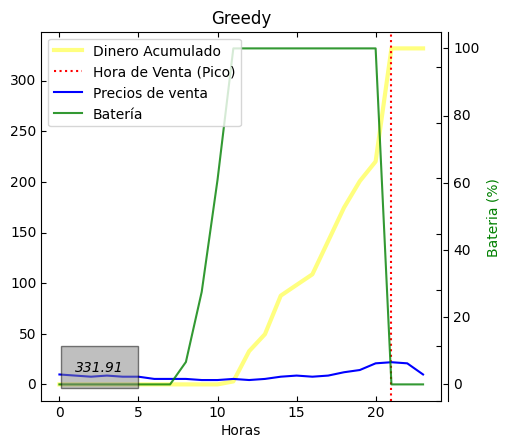

                     0
Ev. Medias        1.00
Ev. Mejor         0.00
Ev. Desviación    0.00
Mejor €         331.91
Media €         331.91
Desviación €      0.00


In [19]:
algorithm_name = greedy_name

evaluar_algoritmo(greedy_name)

#### Búsqueda aleatoria

El Algoritmo de Búsqueda Aleatoria (BA) consistirá en generar aleatoriamente una solución en cada iteración debiéndose ejecutar 100 iteraciones con cada semilla devolviendo la mejor de las iteraciones.

In [20]:
def busqueda_aleatoria(iteraciones = 100):
    solucion = []
    valor_solucion = 0

    totales_dinero = [0] * iteraciones
    contador_evaluaciones = [0]

    for iteracion in range(iteraciones):
        solucion_actual = solucion_inicial()

        '''if iteracion / 10 == 0: representar = True
        else: representar = False'''

        contador_evaluaciones[0] += 1

        valor_solucion_actual = funcion_evaluacion(solucion_actual, radiacion, precio)

        totales_dinero[iteracion] = valor_solucion_actual

        if valor_solucion_actual > valor_solucion:
            solucion = solucion_actual
            valor_solucion = valor_solucion_actual
            # funcion_evaluacion(solucion, radiacion, precio, False)

    return solucion, contador_evaluaciones, totales_dinero

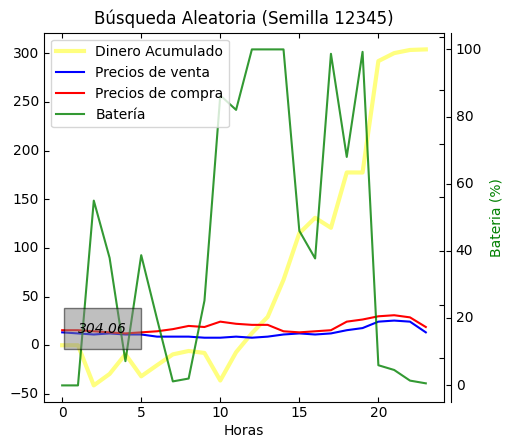

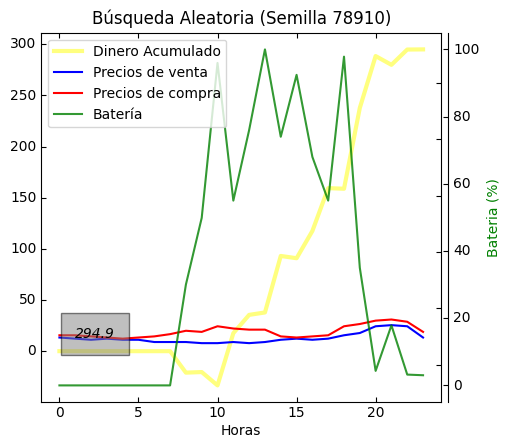

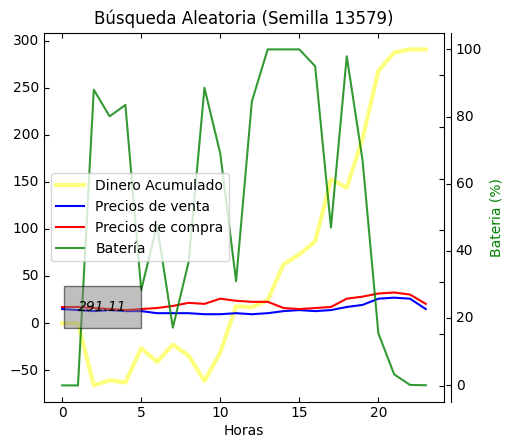

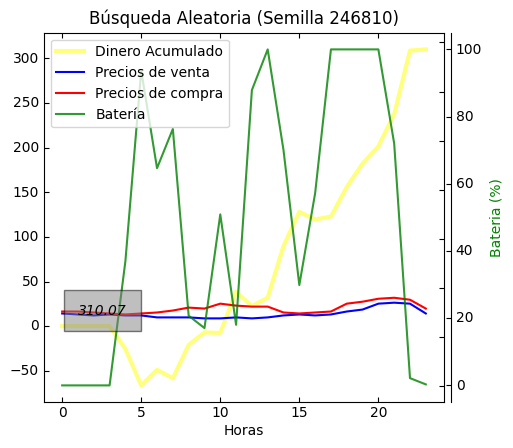

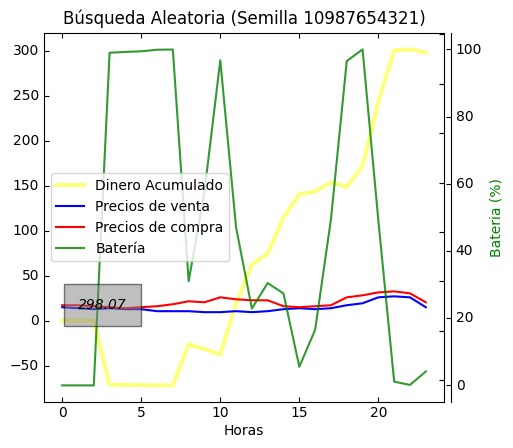

                     0
Ev. Medias      100.00
Ev. Mejor       387.00
Ev. Desviación    0.00
Mejor €         310.07
Media €         226.05
Desviación €     36.22


In [21]:
iteraciones = 100

algorithm_name = busqueda_aleatoria_name

evaluar_algoritmo(algorithm_name, iteraciones)

### Búsquedas Locales el primer mejor y el mejor vecino

Se implementará siguiendo el esquema de el primer mejor y el mejor vecino, según el Tema 1 de teoría.

Se partirá de una solución inicial aleatoria. Los algoritmos de búsqueda local tienen su propia condición de parada, pero adicionalmente, en prevención de tiempos excesivos en algún caso, se añadirá una condición de parada alternativa (OR) basada en el número de evaluaciones que esté realizando la búsqueda, es decir, el número de veces se llame al cálculo de la función de coste. Este valor para la Búsqueda Local será de 3000 llamadas a la función de coste.

Para el número de vecinos del primer mejor se pasará a la siguiente solución cuando se encuentre un vecino mejor mediante una operación de movimiento o se haya alcanzado el número máximo de intentos sin mejora.

Haz un estudio de granularidad del operador de movimiento (al menos tres valores) respecto a la calidad de la solución encontrada. Para ello deberá mostrar varios gráficos de mejor solución (total euros generados) en cada iteración para cada velocidad.

Sobre busqueda local primero mejor:

Los valores de los parámetros max_evaluaciones y max_intentos_sin_mejora deben ser razonables para el problema específico porque estos parámetros afectan la cantidad de tiempo y recursos necesarios para ejecutar el algoritmo de búsqueda local.

El parámetro max_evaluaciones establece el número máximo de evaluaciones de la función de evaluación permitidas. Si el valor es demasiado bajo, el algoritmo puede no ser capaz de encontrar una solución óptima o incluso una solución aceptable. Si el valor es demasiado alto, el algoritmo puede tardar demasiado tiempo en ejecutarse, lo que lo hace ineficiente.

El parámetro max_intentos_sin_mejora establece el número máximo de iteraciones permitidas sin que se produzca una mejora en la solución. Si el valor es demasiado bajo, el algoritmo puede detenerse prematuramente antes de encontrar una solución óptima o aceptable. Si el valor es demasiado alto, el algoritmo puede continuar ejecutándose durante mucho tiempo, lo que también lo hace ineficiente.

Por lo tanto, es importante ajustar estos parámetros según las características específicas del problema para encontrar un equilibrio entre la calidad de la solución y el tiempo y recursos necesarios para encontrarla.

In [22]:
def busqueda_local_primero_mejor(max_evaluaciones=3000, max_intentos_sin_mejora=50):

    # Generar solución inicial
    solucion = solucion_inicial()
    valor_solucion_actual = funcion_evaluacion(solucion, radiacion, precio)
    valor_mejor_vecino = float("-inf")

    # Parametros de control
    totales_dinero = [0] * max_evaluaciones
    contador_evaluaciones = [0]
    intentos_sin_mejora = 0

    while contador_evaluaciones[0] < max_evaluaciones and intentos_sin_mejora < max_intentos_sin_mejora:

        # Generar todos los vecinos y seleccionar el mejor
        mejor_vecino = None
        vecinos = generador_vecino(solucion)

        for vecino in vecinos:
            valor_vecino = funcion_evaluacion(vecino, radiacion, precio)
            if (not mejor_vecino) or (valor_vecino > valor_mejor_vecino):
                mejor_vecino = vecino
                valor_mejor_vecino = valor_vecino

        # Si el mejor vecino mejora la solución actual, se actualiza la solución actual
        if  valor_mejor_vecino > valor_solucion_actual:
            solucion = mejor_vecino
            valor_solucion_actual = valor_mejor_vecino
            intentos_sin_mejora = 0
        else:
            intentos_sin_mejora += 1

        totales_dinero[contador_evaluaciones[0]] = valor_solucion_actual
        contador_evaluaciones[0] += 1

    return solucion, contador_evaluaciones, totales_dinero

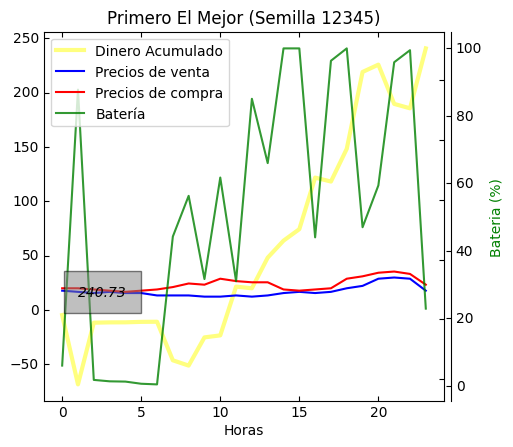

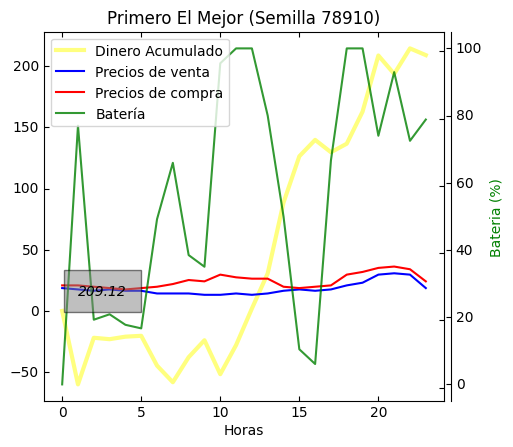

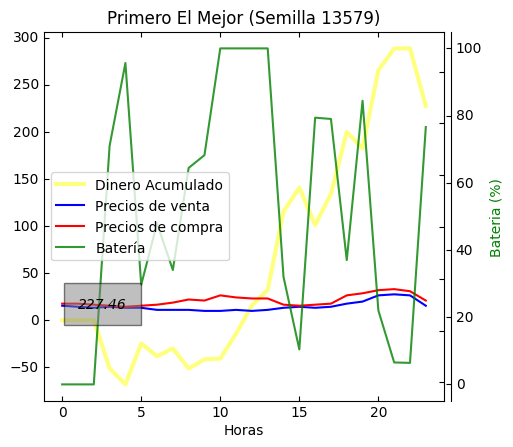

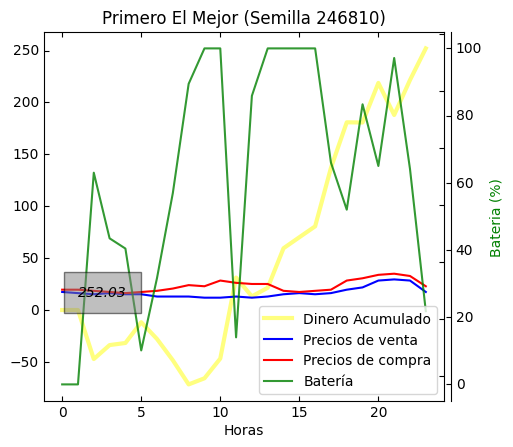

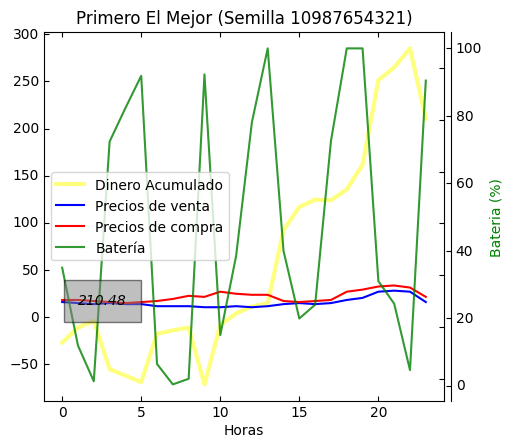

                      0
Ev. Medias      1000.00
Ev. Mejor       9000.00
Ev. Desviación     0.55
Mejor €          252.03
Media €            0.00
Desviación €     107.91


In [23]:
max_evaluaciones=3000
max_intentos_sin_mejora=1000

parametros = [max_evaluaciones, max_intentos_sin_mejora]

algorithm_name = primero_mejor_name

evaluar_algoritmo(algorithm_name, parametros)

In [ ]:
'''
TO-DO TODO: Revisar porqué media € da 0 y desviacion da 0.55, deberia dar 0, tambn el algoritmo debe ir mal porq ev medias es lo metido como max_iterac_sin_mejora
                      0
Ev. Medias      1000.00
Ev. Mejor       9000.00
Ev. Desviación     0.55
Mejor €          252.03
Media €            0.00
Desviación €     107.91
'''

### Búsqueda Local VND
Se implementará 5 niveles de velocidad variable según lo indicado en la teoría.

In [24]:
def busqueda_local_vnd():
    return 0

In [25]:
# parametros = [max_evaluaciones, max_intentos_sin_mejora]
parametros = []

algorithm_name = busqueda_local_vnd_name

# evaluar_algoritmo(algorithm_name, parametros)

### Simulated Annealing

In [111]:
# Función para calcular la temperatura inicial
def calcular_temperatura_inicial(coste_solucion_inicial, probabilidad_aceptacion, mu):
    return (mu / -math.log(probabilidad_aceptacion)) * coste_solucion_inicial

# Función para generar un vecino aleatorio
def generar_vecino(solucion_actual):
    vecino = solucion_actual.copy()
    i, j = random.sample(range(len(vecino)), 2)
    vecino[i], vecino[j] = vecino[j], vecino[i]
    return vecino

# Función de enfriamiento
def enfriamiento_cauchy(temperatura, k):
    return temperatura / (1 + k)

def condicion_parada(iteracion, max_iteraciones):
    """Comprueba si se ha alcanzado el número máximo de iteraciones"""
    if iteracion >= max_iteraciones:
        return True
    else:
        return False

def condicion_enfriamiento(temperatura, num_vecinos_generados):
    k = num_vecinos_generados + 1  # se suma 1 porque se está generando el vecino actual
    nueva_temperatura = temperatura / (1 + k)
    return nueva_temperatura

def temperatura_inicial():
    '''
    Ten en cuenta que esta función utiliza la función solucion_greedy() para obtener la solución inicial y la función costo_solucion(solucion) para calcular el costo de la solución inicial. Por lo tanto, debes asegurarte de que esas funciones estén correctamente definidas en tu código.
    '''
    # Definir los parámetros de experimentación
    phi = 0.2
    mu = 0.2

    # Obtener el costo de la solución inicial
    solucion_inicial = solucion_greedy()
    costo_inicial = costo_solucion(solucion_inicial)

    # Calcular la temperatura inicial
    t0 = (mu / -math.log(phi)) * costo_inicial

    return t0

# Implementación del algoritmo Simulated Annealing
def simulated_annealing():

    # Generar solución inicial
    solucion_actual = solucion_inicial()
    coste_solucion_actual = funcion_evaluacion(solucion_actual)

    # Parámetros de control
    mejor_solucion = solucion_actual.copy()
    coste_mejor_solucion = coste_solucion_actual
    temperatura = temperatura_inicial()
    iteracion = 0
    num_vecinos_generados = 0



    while condicion_parada(iteracion):

        # Generar un vecino aleatorio
        vecino = generar_vecino(solucion_actual)
        coste_vecino = funcion_evaluacion(vecino)

        # Calcular la probabilidad de aceptar el vecino
        delta = coste_vecino - coste_solucion_actual
        probabilidad_aceptacion = math.exp(delta / temperatura)

        # Si el vecino es mejor, se acepta
        if delta < 0:
            solucion_actual = vecino
            coste_solucion_actual = coste_vecino

            # Si se mejora la mejor solución encontrada, se actualiza
            if coste_vecino < coste_mejor_solucion:
                mejor_solucion = vecino.copy()
                coste_mejor_solucion = coste_vecino

        # Si el vecino no es mejor, se acepta con una cierta probabilidad
        elif random.uniform(0, 1) < probabilidad_aceptacion:
            solucion_actual = vecino
            coste_solucion_actual = coste_vecino

        # Actualizar el número de vecinos generados
        num_vecinos_generados += 1

        # Enfriar la temperatura
        temperatura = condicion_enfriamiento(temperatura, num_vecinos_generados)

        # Incrementar la iteración
        iteracion += 1

    return mejor_solucion, coste_mejor_solucion

In [112]:
max_evaluaciones=3000
max_intentos_sin_mejora=50

parametros = [max_evaluaciones, max_intentos_sin_mejora]

algorithm_name = enfriamiento_simulado_name

evaluar_algoritmo(algorithm_name, parametros)

TypeError: simulated_annealing() takes 0 positional arguments but 1 was given

### Búsqueda Tabú

In [ ]:
def busqueda_tabu(tmax):
    # Parámetros de la búsqueda tabú
    tabu_list = [] # tabu_list
    mejor_solucion = None
    mejor_valor = float('-inf')
    iteracion_actual = 0

    # Generar la solución inicial
    solucion_actual = solucion_inicial()
    valor_actual = funcion_evaluacion(solucion_actual, radiacion, precio)

    # Mientras no se cumpla el criterio de parada
    tiempo_inicio = time()
    while (time() - tiempo_inicio) < tmax:

        # Incrementar la iteración
        iteracion_actual += 1

        # Generar la vecindad de la solución actual
        vecindad = []
        for i in range(24):
            solucion_vecina = solucion_actual.copy()
            solucion_vecina[i] += 1
            if solucion_vecina not in tabu_list:
                vecindad.append(solucion_vecina)

            solucion_vecina = solucion_actual.copy()
            solucion_vecina[i] -= 1
            if solucion_vecina not in tabu_list:
                vecindad.append(solucion_vecina)

        # Evaluar la vecindad y actualizar la mejor solución
        mejor_solucion_vecina = None
        mejor_valor_vecino = float('-inf')
        for solucion_vecina in vecindad:
            valor_vecino = funcion_evaluacion(solucion_vecina, radiacion, precio)

            if valor_vecino > mejor_valor_vecino:
                mejor_solucion_vecina = solucion_vecina
                mejor_valor_vecino = valor_vecino

        # Actualizar la solución actual y la lista tabú
        solucion_actual = mejor_solucion_vecina
        valor_actual = mejor_valor_vecino
        tabu_list.append(solucion_actual)

        # Actualizar la mejor solución
        if mejor_valor_vecino > mejor_valor:
            mejor_solucion = mejor_solucion_vecina
            mejor_valor = mejor_valor_vecino

        # Eliminar elementos antiguos de la lista tabú
        if len(tabu_list) > 10:
            tabu_list.pop(0)

    # Devolver la mejor solución encontrada
    return mejor_solucion, mejor_valor